In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [19]:
csv_in = 'dm-mid-p5.csv'

# To show all rows and columns in the results 
pd.options.display.max_columns=999
pd.options.display.max_rows=999

In [20]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
display(df.head())

(40, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Jpn     40 non-null     int64
 1   Eng     40 non-null     int64
 2   Math    40 non-null     int64
 3   Phys    40 non-null     int64
 4   Chem    40 non-null     int64
dtypes: int64(5)
memory usage: 1.7 KB
None


,Jpn,Eng,Math,Phys,Chem
0,63,64,55,57,66
1,45,41,45,54,51
2,64,63,65,74,74
3,56,55,58,57,57
4,44,50,50,40,47


In [21]:
dfX = df.loc[:, :]
print(dfX.shape)
display(dfX.head())

(40, 5)


,Jpn,Eng,Math,Phys,Chem
0,63,64,55,57,66
1,45,41,45,54,51
2,64,63,65,74,74
3,56,55,58,57,57
4,44,50,50,40,47


In [22]:
sc = StandardScaler()
X_std = sc.fit_transform(dfX)

In [23]:
n_pca = 5
pca = PCA(n_components=n_pca)
X_pca = pca.fit_transform(X_std)

In [24]:
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

[0.6301485  0.22585869 0.06644788 0.04295129 0.03459364]
[0.6301485  0.85600719 0.92245506 0.96540636 1.        ]


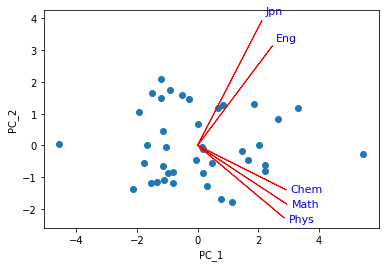

In [25]:
def biplot(X_2d, coef_2d, coef_labels=None):
    r1 = 6
    r2 = 1.05
    coef_2dT = coef_2d.T
    if coef_labels is None:
        coef_labels = range(len(coef_2dT))
    for i, coef in enumerate(coef_2dT):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, coef_labels[i],
                 color='b', fontsize=11)
    plt.scatter(X_2d[:,0], X_2d[:,1])
    plt.xlabel('PC_1')
    plt.ylabel('PC_2')
    return None

# example
biplot(X_pca[:, :2], pca.components_[:2], coef_labels=dfX.columns)